
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction to Python for Data Sciences</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> </td>
</tr>
</table>



<br/><br/>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 4 - Scikit Learn </a></center> 

<br/><br/>

# 3- Unsupervised Learning

##  Clustering


Clustering is the task of assigning data points to a known number of classes. The *K Means* algorithm is one of the most well known, it clusters data by minimizing the squared distance of cluster points to their mean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set() 

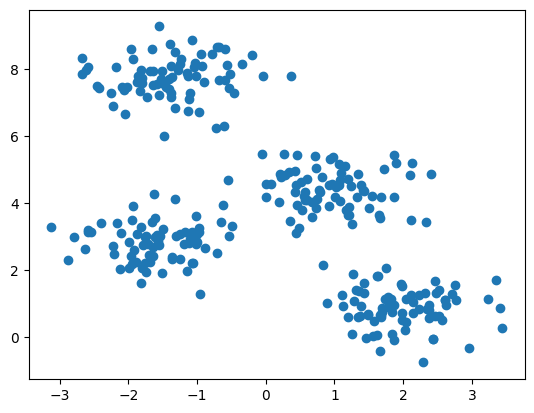

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

As before, we proceed by selecting a KMeans model and fitting it to the data.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

From the model, one can get the *data points labels* with the attribute <tt>labels_</tt> and the cluster centers with <tt>cluster\_centers_</tt>.

In [4]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 2 0 2 1 1 3 0 2 2 3 2 0 2 1 0 0 1 3 3 1 1 0 3 3 0 1 0 3 0 2 2 0 2 2 2 2
 2 3 1 0 3 0 0 3 3 2 3 2 1 3 1 2 1 1 3 2 3 2 1 2 0 2 3 3 3 2 1 2 3 0 3 2 3
 3 2 3 0 1 2 1 0 1 1 2 0 1 0 2 2 0 1 2 3 3 0 1 1 0 3 2 1 2 1 0 1 1 0 2 0 3
 3 1 2 1 0 2 1 1 0 3 1 3 1 1 1 1 3 1 3 2 3 3 1 2 3 3 2 0 2 2 3 0 3 0 3 2 0
 2 2 2 0 2 0 1 3 2 3 1 0 2 0 0 1 0 3 3 0 1 0 0 2 1 0 3 2 1 1 0 3 1 0 3 3 0
 0 0 0 1 2 0 3 0 0 3 3 3 0 3 2 0 3 1 3 0 2 3 2 0 2 0 3 0 0 2 3 3 1 1 0 2 1
 1 3 1 3 0 2 2 0 0 2 0 1 3 0 1 3 2 3 1 0 1 2 2 2 2 3 3 2 0 3 1 0 3 3 3 1 1
 2 0 0 3 1 2 3 0 2 0 1 1 3 3 0 1 1 1 0 2 2 1 1 0 1 1 1 2 3 2 0 1 1 2 2 2 1
 1 0 2 3]
[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


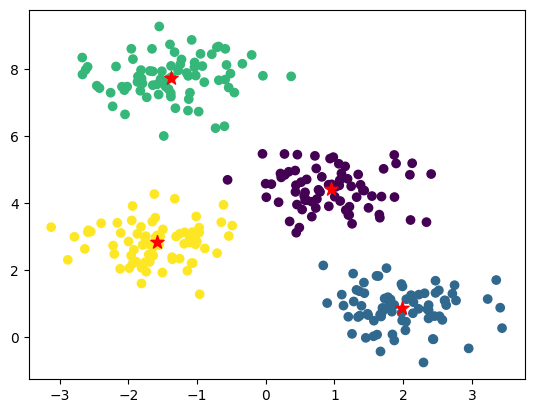

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r' , s = 100 , marker="*")

The different clusters have visibly been recovered. It is to be noted that from the cluster center, one can define Voronoi regions (regions that are closer to one center than any other one) that are exactly the predicted regions from the K Means algorithm.

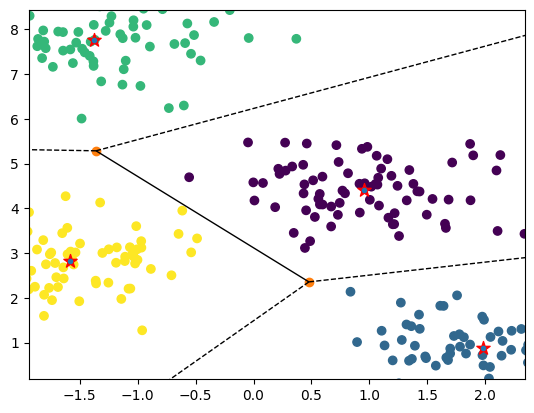

In [6]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(kmeans.cluster_centers_)
voronoi_plot_2d(vor)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r' , s = 100 , marker="*")
plt.show()

## Dimension reduction


In order to reduce the dimension of our features either for direct learning or for visualization, dimension reduction is important and is implemented extensively in Scikit Learn [Decompositions](http://scikit-learn.org/stable/modules/decomposition.html#decompositions).

One of the most standard methods is the *Principal Components Analysis* (PCA) that consists in projecting the feature matrix onto its top $n$ singular values (This was used in image compression in the NumPy notebook). 

### A first example 

Let us look at the PCA on a 2D synthetic data.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

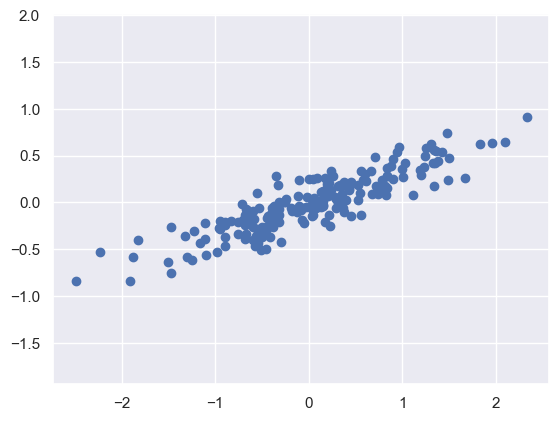

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [9]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X)

PCA(n_components=2)

The PCA model outputs <tt>components_</tt> that are the singular vectors and <tt>explained\_variance_</tt> for the magnitude of the associated singular values.

In [10]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


This illustration is provided in the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas. The greater axis is more informative and thus the second one would be dropped in the case of 1D dimensional reduction.

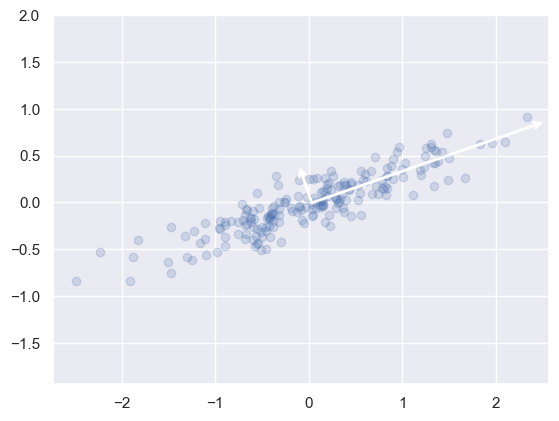

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### Dimension reduction and visualization on the iris dataset

The features are 4D and thus hard to represent; instead of taking just 2, let us apply PCA to find 2 interesting meta features. 


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



iris = pd.read_csv('data/iris.csv')
classes = pd.DataFrame(iris["species"])
features = iris.drop(["species",],axis=1)

lenc = LabelEncoder()
num_classes = np.array(classes.apply(lenc.fit_transform))

In [13]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
pca = PCA(2)
pca.fit(features)

PCA(n_components=2)

In [15]:
reduction = pd.DataFrame(pca.components_)
reduction.columns = ["sepal_length","sepal_width","petal_length","petal_width"]
reduction["---- Variance ----"] = pca.explained_variance_
reduction.index = ["vec. 1", "vec. 2"]
reduction

,sepal_length,sepal_width,petal_length,petal_width,---- Variance ----
vec. 1,0.361387,-0.084523,0.856671,0.358289,4.228242
vec. 2,0.656589,0.730161,-0.173373,-0.075481,0.242671


We notice an important first vector that combines the 4 features (sepal_width seems less important).

We can now <tt>project</tt> the data onto these two vectors and plot the result to see if the classes are recognizable in this reduced space.

Text(0, 0.5, 'vec. 2')

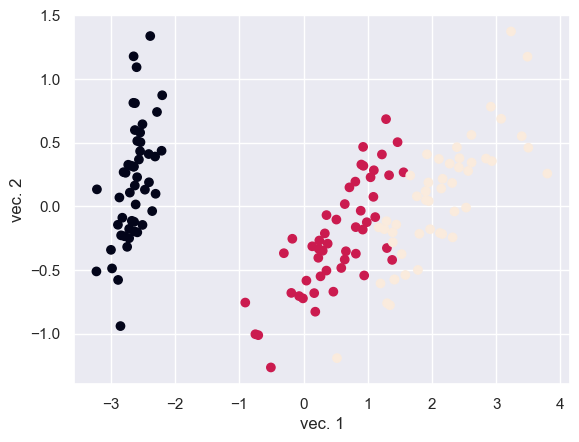

In [22]:
projected = pca.transform(features)

plt.scatter(projected[:, 0], projected[:, 1], c=num_classes)
plt.xlabel('vec. 1')
plt.ylabel('vec. 2')

We see that the classes are way more separable this way than with just 2 features (see before). Furthermore, the vector 1 can almost be used alone to separate.

## Exercises 

> **Exercise:** *Clustering for color compression in images.* 
>
> Take a black and white image with 256 gray levels, the (1D) vector of its pixel values can be obtained with the `flatten` method of NumPy. 
> 
> The goal of this exercise is to use clustering to convert the 255 greyscale values of the pixels to 8 values. To do so:
> * cluster the pixels values into 8 clusters and replace the pixels values with their cluster centroids.
> * Compare with a *uniform* quantizer.

(480, 640)


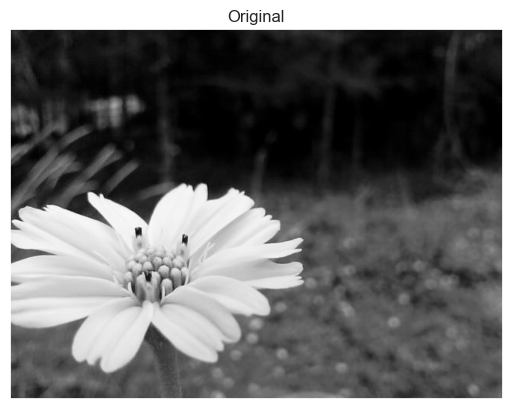

In [23]:
# Définition de l'image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

#### IMAGE
img = mpimg.imread('img/flower.png')
img_gray =  0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2] # Apparently these are "good" coefficients to convert to grayscale
####

print(img_gray.shape)

plt.figure()
plt.xticks([]),plt.yticks([])
plt.title("Original")
plt.imshow(img_gray, cmap = cm.Greys_r) 
plt.show()

In [25]:
# Aplatir l'image
pixels = img_gray.flatten().reshape(-1, 1)
m,n = pixels.shape

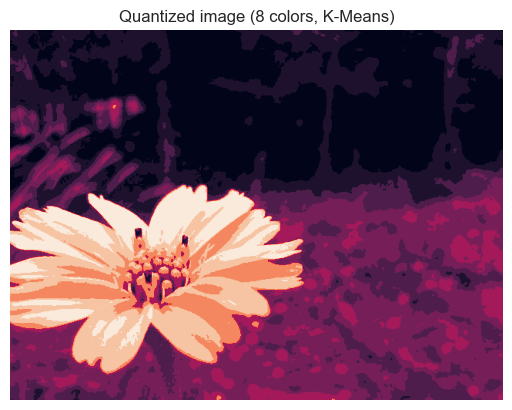

In [42]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
n_clusters = 8

# On prend 
image_array_sample = shuffle(pixels, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters, random_state=0).fit(image_array_sample)
labels = kmeans.predict(pixels)

def recreate_image(codebook, labels):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(480, 640, -1)

plt.figure(2)
plt.axis("off")
plt.title(f"Quantized image ({n_clusters} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels))
